In [127]:
import argparse
import os
import uuid
from IPython.core.magic import register_cell_magic
from IPython.display import SVG

@register_cell_magic
def plantuml(line, cell):
    """Generate and display a figure using Plantuml.
    Usage:
      %java -jar plantuml.jar -tsvg filname
    """

    parser = argparse.ArgumentParser()
    parser.add_argument("-n", "--name", type=str, default=None,
                        help="persist as <name>.uml and <name>.svg after rendering")
    parser.add_argument("-d", "--directory", default=None,
                        help="directory to save renders in")
    args = parser.parse_args(line.split() if line else "")

    retain = args.name is not None
    if args.directory :
        directory = args.directory + "/"
    else:
        directory = ""
    base_name = args.name or str(uuid.uuid4())

    uml_path = directory + base_name + ".uml"
    svg_path = directory + base_name + ".svg"
    eps_path = directory + base_name + ".eps"

    with open(uml_path, 'w') as fp:
        fp.write(cell)

    try:
        os.system("java -jar plantuml.jar -tsvg %s" % uml_path)
        #os.system("java -jar plantuml.jar -tlatex:nopreamble %s" % uml_path)
        return SVG(filename=svg_path)
    finally:
        if os.path.exists(uml_path):
            os.unlink(uml_path)
        if not retain:
            os.unlink(svg_path)
            #os.unlink(eps_path)

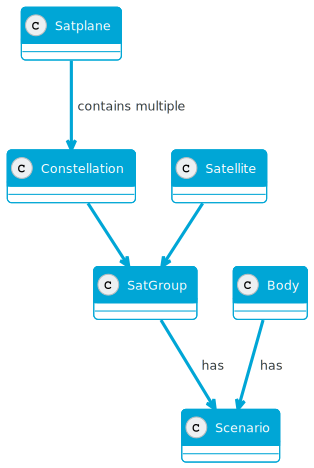

In [45]:
%%plantuml -n test -d D:/git/thesis_report_ae/figures

@startuml
!include D:\git\puml-themes\themes\tudelft\puml-theme-tudelft-outline.puml

class Scenario

class SatGroup

class Body

class Constellation

class Satellite

class Satplane

Satplane --> Constellation : contains multiple
Constellation --> SatGroup
Satellite --> SatGroup

SatGroup --> Scenario : has
Body --> Scenario : has

@enduml

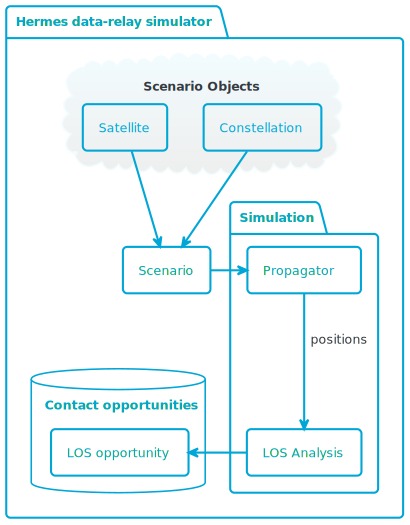

In [130]:
%%plantuml -n hermes_overview -d D:/git/thesis_report_ae/figures

@startuml
!include D:\git\puml-themes\themes\tudelft\puml-theme-tudelft-outline.puml

skinparam componentStyle rectangle

package "Hermes data-relay simulator" {

    package "Simulation" {
        [Propagator  ] -d-> [LOS Analysis] : positions
    }

    [Scenario] -l-> [Propagator  ]

    cloud "Scenario Objects" {
        [Satellite] --> [Scenario]
        [Constellation] --> [Scenario]
    }

    database "Contact opportunities" {
        [LOS opportunity]
    }
    [LOS Analysis] -r-> [LOS opportunity]

}

@enduml




UsageError: Cell magic `%%plantuml` not found.
